# For 3D-Plotting Predictions

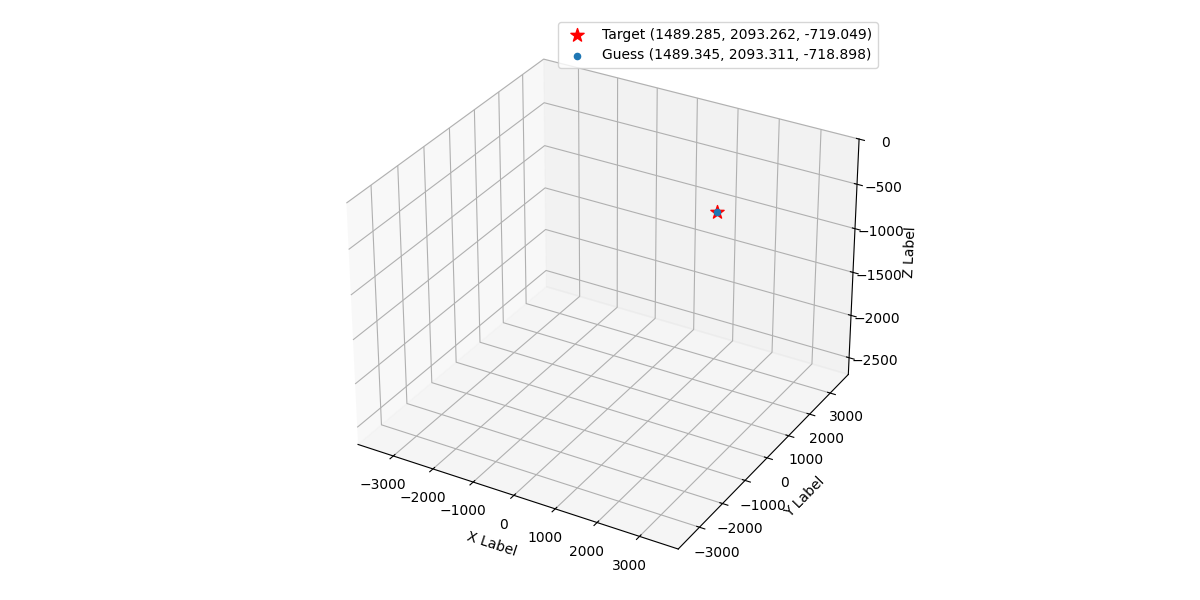

In [5]:
%matplotlib widget

from data_analysis_utils import *
from torch.utils.data import DataLoader
import torch
import math

album_path = '/data/i3store/users/ssued/albums/RNO_album_10_13_2025_spherical_debug/album_RNO4.hdf5'

checkpoint_path = '/data/condor_shared/users/ssued/machine_learning/vertices_RNO4/model_1.1.1_benchmark_3/experiments/exp_e5000_bn1_tr8_te8_lfn-MSELoss_opt-Adam_lr-0.001_lReLU-0.01/checkpoints/checkpoint_e4999.pth'
album = AlbumDataset(album_path, transform=None, target_transform=None)
data_loader = DataLoader(dataset = album, batch_size = 1, shuffle = True)

test_model = RNO_four_1_1_1s_batch_norm_extraconv(input_shape=1,
                          hidden_units=20, 
                          output_shape=3,
                          num_epochs=1,
                          batch_size=1,
                          num_train_batches=1
                         )

checkpoint = torch.load(checkpoint_path)
test_model.load_state_dict(checkpoint['model_state_dict'])

import matplotlib.pyplot as plt
import numpy as np

target = None
guess = None

for batch,(X,y) in enumerate(data_loader):
    y_pred = test_model(X)
    guess = y_pred.detach().numpy()
    target = y.squeeze().detach().numpy()
    break


fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(projection='3d')

def polar2cart(coord):
    r, phi, theta = coord
    
    return [
         r * math.sin(theta) * math.cos(phi),
         r * math.sin(theta) * math.sin(phi),
         r * math.cos(theta)
    ]

def normalized_polar2cart(coord):
    r, phi, theta = coord
    r = r * album.get_rnorm()
    phi = phi*2*np.pi
    theta = theta*2*np.pi
    
    return [
         r * math.sin(theta) * math.cos(phi),
         r * math.sin(theta) * math.sin(phi),
         r * math.cos(theta)
    ]

x_targ,y_targ,z_targ = polar2cart(target)
x_guess,y_guess,z_guess = normalized_polar2cart(guess)

ax.scatter(x_targ, y_targ, z_targ, label=f'Target ({x_targ:.3f}, {y_targ:.3f}, {z_targ:.3f})', marker='*', color='red', s=100)
ax.scatter(x_guess,y_guess,z_guess,label=f'Guess ({x_guess:.3f}, {y_guess:.3f}, {z_guess:.3f})')
ax.axes.set_xlim(-3900,3900)
ax.axes.set_ylim(-3900,3900)
ax.axes.set_zlim(-2700,0)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
fig.tight_layout()

ax.legend()
plt.show()

# For no extra Convolutions...

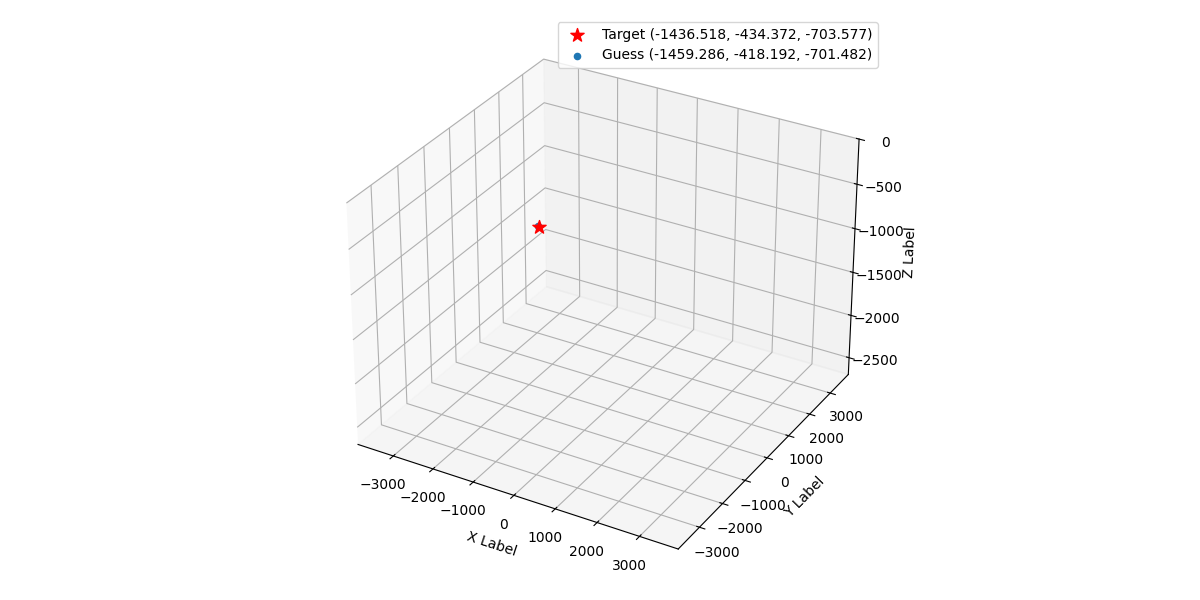

In [3]:
%matplotlib widget

from data_analysis_utils import *
from torch.utils.data import DataLoader
import torch
import math

album_path = '/data/i3store/users/ssued/albums/RNO_album_10_13_2025_spherical_debug/album_RNO4.hdf5'

checkpoint_path = '/data/condor_shared/users/ssued/machine_learning/vertices_RNO4/model_1.1.1_benchmark_3/experiments/exp_e100000_bn1_tr8_te8_lfn-MSELoss_opt-Adam_lr-0.001_tanh-no_lReLU-yes/checkpoints/checkpoint_e4815.pth'
album = AlbumDataset(album_path, transform=None, target_transform=None)
data_loader = DataLoader(dataset = album, batch_size = 1, shuffle = True)

test_model = RNO_four_1_1_1s(input_shape=1,
                          hidden_units=20, 
                          output_shape=3,
                          num_epochs=1,
                          batch_size=1,
                          num_train_batches=1
                         )

checkpoint = torch.load(checkpoint_path)
test_model.load_state_dict(checkpoint['model_state_dict'])

import matplotlib.pyplot as plt
import numpy as np

target = None
guess = None

for batch,(X,y) in enumerate(data_loader):
    y_pred = test_model(X)
    guess = y_pred.detach().numpy()
    target = y.squeeze().detach().numpy()
    break


fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(projection='3d')

def polar2cart(coord):
    r, phi, theta = coord
    
    return [
         r * math.sin(theta) * math.cos(phi),
         r * math.sin(theta) * math.sin(phi),
         r * math.cos(theta)
    ]

def normalized_polar2cart(coord):
    r, phi, theta = coord
    r = r * album.get_rnorm()
    phi = phi*2*np.pi
    theta = theta*2*np.pi
    
    return [
         r * math.sin(theta) * math.cos(phi),
         r * math.sin(theta) * math.sin(phi),
         r * math.cos(theta)
    ]

x_targ,y_targ,z_targ = polar2cart(target)
x_guess,y_guess,z_guess = normalized_polar2cart(guess)

ax.scatter(x_targ, y_targ, z_targ, label=f'Target ({x_targ:.3f}, {y_targ:.3f}, {z_targ:.3f})', marker='*', color='red', s=100)
ax.scatter(x_guess,y_guess,z_guess,label=f'Guess ({x_guess:.3f}, {y_guess:.3f}, {z_guess:.3f})')
ax.axes.set_xlim(-3900,3900)
ax.axes.set_ylim(-3900,3900)
ax.axes.set_zlim(-2700,0)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
fig.tight_layout()

ax.legend()
plt.show()

## For model_1.1.1_extra_conv on 10k dataset

In [ ]:
%matplotlib widget

from cProfile import label
from data_analysis_utils import *
from torch.utils.data import DataLoader
import torch
import math

album_path = '/data/i3store/users/ssued/albums/RNO_album_10_13_2025_10k/album_RNO4.hdf5'

checkpoint_path = '/data/condor_shared/users/ssued/machine_learning/vertices_RNO4/model_1.1.1_extra_conv/experiments/exp_e100000000_bn128_tr269_te68_lfn-MSELoss_opt-Adam_hiddenu-20_lr-0.001_lReLU-0.01extra_conv_layer/checkpoints/checkpoint_e1200.pth'
album = AlbumDataset(album_path, transform=None, target_transform=None,label_transform='spherical')
data_loader = DataLoader(dataset = album, batch_size =10, shuffle = True)

test_model = RNO_four_1_1_1s_batch_norm_extraconv(input_shape=1,
                          hidden_units=20, 
                          output_shape=3,
                          num_epochs=1,
                          batch_size=128,
                          num_train_batches=1
                         )

checkpoint = torch.load(checkpoint_path)
test_model.load_state_dict(checkpoint['model_state_dict'])

loss_fn = torch.nn.MSELoss()

import matplotlib.pyplot as plt
import numpy as np

target = None
guess = None

with torch.inference_mode():
    for batch,(X,y) in enumerate(data_loader):
        y_pred = test_model(X)
        guess = y_pred.detach().numpy()
        target = y.squeeze().detach().numpy()
        print([(yp, y0) for yp, y0 in zip(y_pred[:5], y[:5])])


        loss = loss_fn(y_pred.squeeze(), y.squeeze()).item()
        break


fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(projection='3d')

def polar2cart(coord):
    r, phi, theta = coord
    
    return [
         r * math.sin(phi) * math.cos(theta),
         r * math.sin(phi) * math.sin(theta),
         r * math.cos(phi)
    ]

def normalized_polar2cart(coord):
    r, phi, theta = coord
    r = r * album.get_rnorm()
    phi = phi*np.pi
    theta = theta*2*np.pi

    return [
         r * math.sin(phi) * math.cos(theta),
         r * math.sin(phi) * math.sin(theta),
         r * math.cos(phi)
    ]

x_targ,y_targ,z_targ = normalized_polar2cart(target)
x_guess,y_guess,z_guess = normalized_polar2cart(guess)

distance = np.sqrt((x_targ - x_guess)**2 + (y_targ - y_guess)**2 + (z_targ - z_guess)**2)

# PRINTING DEBUG
# print(x_targ, y_targ, z_targ)
# print(x_guess, y_guess, z_guess)
# print(distance)
# print(loss)

ax.set_title(f'Loss: {loss:.6f} Distance: {distance:.3f}')
ax.scatter(0,0,0,label='Origin', marker='o', color='green', s=50)
ax.scatter(x_targ, y_targ, z_targ, label=f'Target ({x_targ:.3f}, {y_targ:.3f}, {z_targ:.3f})', marker='*', color='red', s=100)
ax.scatter(x_guess,y_guess,z_guess,label=f'Guess ({x_guess:.3f}, {y_guess:.3f}, {z_guess:.3f})')
ax.axes.set_xlim(-3900,3900)
ax.axes.set_ylim(-3900,3900)
ax.axes.set_zlim(-2700,0)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
fig.tight_layout()

ax.legend()
plt.show()

ValueError: can only convert an array of size 1 to a Python scalar